<a href="https://colab.research.google.com/github/sks95/FreeCodeCamp_python/blob/main/Data_Analysis/CryptoLiveEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Request data from a live crypto website and perform basic EDA

In this case, perform analysis on BTC and ETH for the past 7 days

In [1]:
import requests
import pandas as pd

Predefined function to import data from a Crypto website

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Pull data from Bitcoin and Ether for the last 7 days using above function

In [5]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-22 18:39:45.714508')

In [6]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [7]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [8]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-22 19:00:00,19078,19213,18973,19185,76.821524,1.468211e+06
2022-09-22 20:00:00,19215,19491,19207,19308,245.566679,4.750745e+06
2022-09-22 21:00:00,19320,19359,19246,19249,23.438466,4.524559e+05
2022-09-22 22:00:00,19251,19282,19165,19172,48.637249,9.348905e+05
2022-09-22 23:00:00,19201,19433,19170,19400,40.930319,7.926811e+05


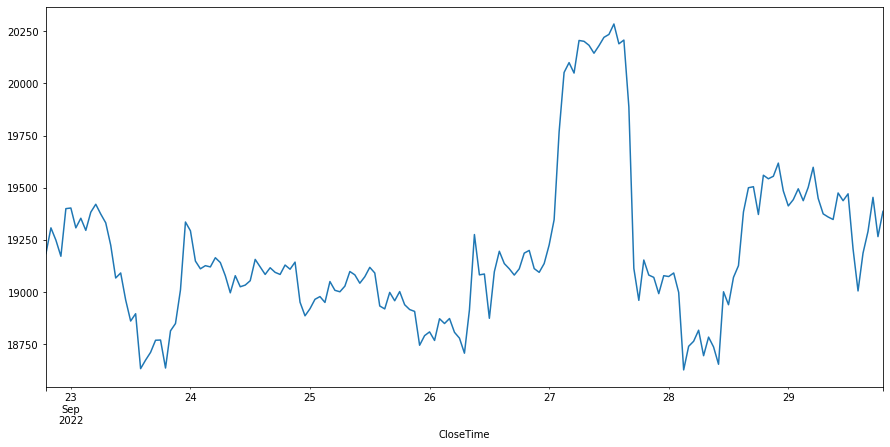

In [9]:
btc['ClosePrice'].plot(figsize=(15,7))

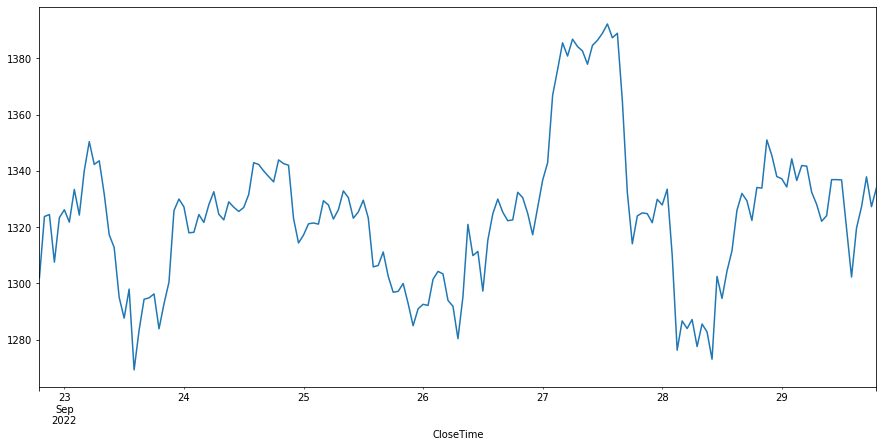

In [10]:
eth['ClosePrice'].plot(figsize=(15,7))

Bokeh Dynamic Plots

In [11]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [12]:
output_notebook()

In [13]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

Exporting to Excel

In [14]:
writer = pd.ExcelWriter('Cryptos.xlsx')

In [15]:
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Etherium')

Save the file by using writer.save()

In [16]:
writer.save()